# Classification

## MNIST



In [1]:
from sklearn.datasets import fetch_mldata
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_mldata('MNIST original')
mnist

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [2]:
X, y = mnist['data'], mnist['target']

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

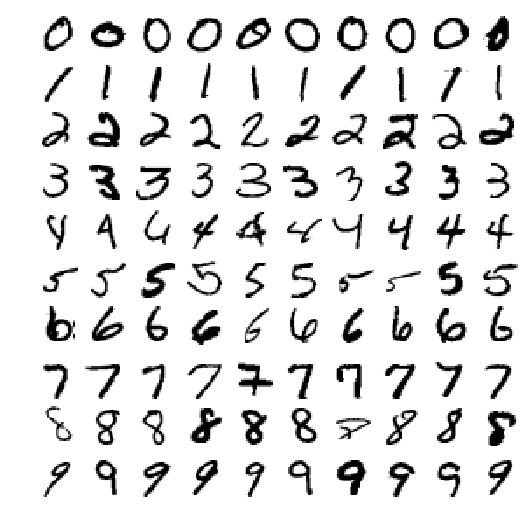

In [5]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")


plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
# save_fig("more_digits_plot")
plt.show()

# Binary classifier

In [6]:
import numpy as np

#split your data between training and testing
X_train, X_test, y_train, y_test =  X[:60000], X[60000:], y[:60000], y[60000:]

#shuffle your training set to guarentee that all cross-validation folds will be similar.  Some learning algorithms
#are sensitive to the order of the data

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [7]:
from sklearn.linear_model import SGDClassifier

y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

'''Stochastic Gradient Descent (SGD) classifier: Handles large datasets very effectively.

This SGD classifier relies on randomness druing training.  If one wants reporduciible results, you should set the random_state paramter.'''

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_3)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

Image of dataset: 


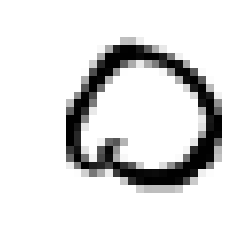

Classified as:  0
Is this a 3? False


In [9]:
#test out your model

import matplotlib
import matplotlib.pyplot as plt

i = 100 #must be less than 70000 (size of dataset)

some_digit = X[i]
some_digit_image = some_digit.reshape(28,28)

print('Image of dataset: ')
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

print('Classified as: ', int(y[i]))

#Test your classifier

print('Is this a 3?', sgd_clf.predict([some_digit])[0])

# Evaluate its performance

## Measuring accuracy using cross-validation

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)
'''This foreloop does about the same thing as cross_val_score in the next cell.

Understand the logic of what it is trying to accomplish'''
for train_index, test_index in skfolds.split(X_train, y_train_3):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_3[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_3[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.952902354882


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.95335


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.958797939897


In [10]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring='accuracy')

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

array([ 0.95290235,  0.95335   ,  0.95879794])

Around 95% correct classification!

This is somewhat impressive, but remember this process is only for a binarized classifier and this only tests the positively identified.  What about the not-3 numbers?

In [11]:
from sklearn.base import BaseEstimator

class never3Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_3_clf = never3Classifier()
cross_val_score(never_3_clf, X_train, y_train_3, cv=3, scoring='accuracy')

array([ 0.89675,  0.9005 ,  0.8962 ])

Around 90% accurate.

So, of those that were accurately classified as 3, there was a 96% accuracy and of those that were classified as not 3, but were; 10% of the 3s were mis-classified as not-3.

The problem is that if you were to guess that an image is not 3, there is a 90% chance that you are correct (10 numbers).  Not the best measure.

Accuracy is generall not the preferred perfomamce measure for classifiers, specially when you are dealing with skewed datasets (ie when some classes are much more frequent than others).

## Confusion Matrix

A much better way to evaluate the performance of  a classifier is to look at the confusion matrix.  The general idea is to count the nymber of times instances of class A are classifireds as class B.  For esample, to know the number of times the classifier confused images of 5s with 3s, you would look ain the 5th row and 3rd column of the confusion matrix.

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)
confusion_matrix(y_train_3, y_train_pred)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

array([[52586,  1283],
       [ 1416,  4715]])

Sample output:

array([[50775,  3094],
       [  922,  5209]])

Each row of the confusion matrix represents an actual class, while each column represents a predicted class. 

The first row of this matix considers non-3 images: 50,775 were classified as non-3s (True negatives), while there were 3,094 were wrongly classified as a 3 (False positives)

The second row of this matix considers 922 were wrongly classified as non-3s (False negatives) and 5,209 were correcly classified as 3 (True positives).

A perfect classifier would hanve only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diaganal:

In [13]:
y_train_perfect_predictions = y_train_3

confusion_matrix(y_train_3, y_train_perfect_predictions)

array([[53869,     0],
       [    0,  6131]])

## Precision/ Recall of the classifer

precision = TruePositive/(TruePositive + FalsePositive)

recall = TruePositive/(TruePositive + FalseNegative) aka sensitivity and true positve rate

An easy way to combine the scores:

F1 score = 2 x ((precision * recall)/(precision + recall)) aka Harmonic mean of precision and recall

In [14]:
from sklearn.metrics import precision_score, recall_score

precision = 5209 / (5209 + 3094)

skprecision = precision_score(y_train_3, y_train_pred)

recall = 5209 / (5209 + 922)

skrecall = recall_score(y_train_3, y_train_pred)

print('my own precision:\t', precision, '\tsklearn precision:\t', skprecision)
print('my own recall:\t\t', recall, '\tsklearn recall:\t\t', skrecall)

my own precision:	 0.6273636035168012 	sklearn precision:	 0.786095365122
my own recall:		 0.849616702006198 	sklearn recall:		 0.769042570543


The classifier is precise (when it claims an image is a specific class) 63% of the time.
The classifier only detects a 3, 85% of the actual 3s. 

It is often convenient to combine the precision and recall values in the F1 value.

In [15]:
from sklearn.metrics import f1_score

f1_score(y_train_3, y_train_pred)

0.77747547200923417

### Precision/Recall trade off

Lowering the threshold to increase recall, reduces precision and visaversa.

Using the decision function will allow one to investigate what this threshold does.


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

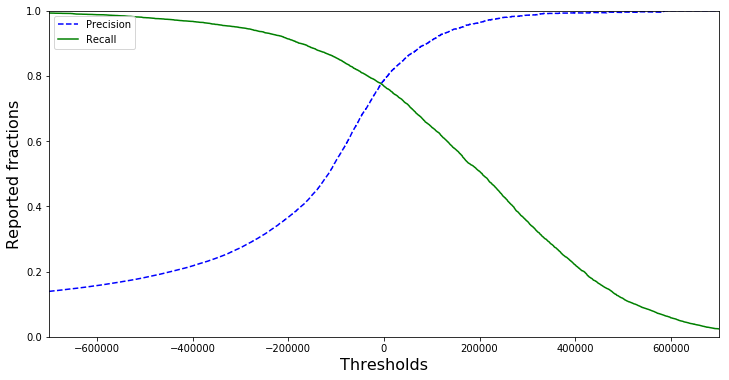

In [16]:
from sklearn.metrics import precision_recall_curve

def plotPrecisionRecallVsThreshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel("Thresholds", fontsize = 16)
    plt.ylabel("Reported fractions", fontsize = 16)
    plt.legend(loc='upper left')
    plt.ylim([0,1])
    plt.xlim([-700000, 700000])

y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3, method='decision_function')


precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

plt.figure(figsize=(12, 6))
plotPrecisionRecallVsThreshold(precisions, recalls, thresholds)
plt.show()


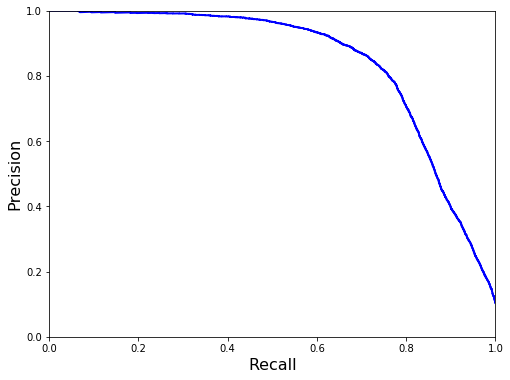

In [17]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

# ROC curves

Receiver operating characteristics (ROC) curve is another common tool used with binary classiferes

Plot the true positive rate (recall) against the false positive rate.  The false positive rate is the ratio of negative instances that are incorreclty classified as postive.  It is one mius the true negative rate (TNR), which is the ratio of negative instances that are correctly classified as negiatve.  The TNR is also called specificity.

Thus, it plots the sensitvity (recall) versus 1 - specificity

You would want a low False negative rat and high true positive rate.

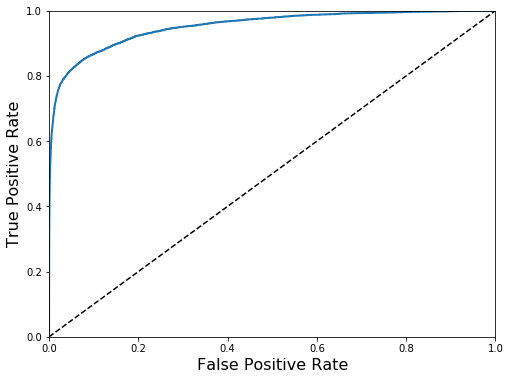

In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

## Using ROC to assess the classifier

Plot the two ROC together.

### Area under the curve (AUC)

One way to compare between ROC curves.

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_3, cv=3, method='predict_proba')
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_3, y_scores_forest)

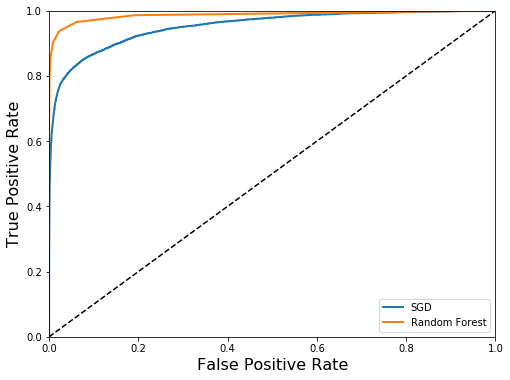

In [20]:
plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, linewidth=2, label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc='lower right')
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_3, y_scores)

0.95212351157650954

In [22]:
roc_auc_score(y_train_3, y_scores_forest)

0.98677048202853901

In [23]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_3, cv=3)
print("Precision:", precision_score(y_train_3, y_train_pred_forest))
print("Recall:", recall_score(y_train_3, y_train_pred_forest))

Precision: 0.989638358391
Recall: 0.79448703311


# Multiclass Classification

Some algorithms are capable of andling multiple classes directly (such as Random Forest classifier and naive Bayes classifiers).  

Others are stricly binary classifiers (such as Support Vector Machine (SVM) classifers or Linear classifiers).  One way to create a system that can classify teh digit images into 10 classes is tro train 10 binary classes, one fore each digit.  Then when you wan to classify an image, you get the decision score from each classifier for that image and you select the class whole classifier outputs the highest score (*ONE VERSES ALL (OvA)*)

You can also create (*ONE VERSE ONE (OvO)*), binary classifier to distinguish only between two numbers.  In this case you would need 45 classifiers for 10 digits.

Some classifiers scale poorly with the size of the training set, so for these algoithms OvO is perfereted to train many classifers from smaller sets (such as Support Vector Machines).

Scikit-Learn detects when you try to use a binary classifcation alorithm for a multiclass classification task and it automatically runs OvA (except for SVM classifiers which uses OvO).

In [24]:
i = 19000 #must be less than 70000 (size of dataset)

some_digit = X[i]

sgd_clf.fit(X_train, y_train)
# print(sgf_clf.predict([some_digit])

print('Actually as: ', int(y[i]))

#Test your classifier

print('Predicted to be?', int(sgd_clf.predict([some_digit])[0]))

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Actually as:  3
Predicted to be? 3


In [25]:
i = 5000 #must be less than 70000 (size of dataset)
some_digit = X[i]

print('Actually as: ', int(y[i]))

#Test your classifier
some_digit_scores = sgd_clf.decision_function([some_digit])

print('Predicted to be?', int(sgd_clf.predict([some_digit])[0]))

print('All decision function scores:\n', some_digit_scores)

print("Highest class from decision function score: ", np.argmax(some_digit_scores),
      "(", np.max(some_digit_scores),")")


Actually as:  0
Predicted to be? 0
All decision function scores:
 [[  679730.16865711  -953470.15037583  -454767.2354897   -277198.28516213
  -1091389.41117068  -847496.10351465  -565059.98066972  -870753.11621875
   -470179.58790915  -979776.27299953]]
Highest class from decision function score:  0 ( 679730.168657 )


In [26]:
'''To force OvO strategy on a SGDClassifier'''
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
print('Number of classifers used:', len(ovo_clf.estimators_))


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

Number of classifers used: 45


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [27]:
i = 40000 #must be less than 70000 (size of dataset)
some_digit = X[i]

print('Actually as: ', int(y[i]))

#Test your classifier
some_digit_scores = ovo_clf.decision_function([some_digit])

print('Predicted to be?', int(ovo_clf.predict([some_digit])[0]))

print('All decision function scores:\n', some_digit_scores)

print("Highest class from decision function score: ", np.argmax(some_digit_scores),
      "(", np.max(some_digit_scores),")")

Actually as:  6
Predicted to be? 6
All decision function scores:
 [[ 4.97138258 -0.5         7.37582759  3.9415094   8.27082196  4.03943695
   9.43005945  1.73674392  2.79590828  2.93830986]]
Highest class from decision function score:  6 ( 9.4300594545 )


In [28]:
#Training a RandomForestClassifier
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [29]:
i = 40000 #must be less than 70000 (size of dataset)
some_digit = X[i]

print('Actually as: ', int(y[i]))

#Test your classifier
some_digit_scores = forest_clf.predict_proba([some_digit])

print('Predicted to be?', int(forest_clf.predict([some_digit])[0]))

print('All decision function scores (percentages):\n', some_digit_scores)

print("Highest class from decision function score: ", np.argmax(some_digit_scores),
      "(", np.max(some_digit_scores),")")

Actually as:  6
Predicted to be? 6
All decision function scores (percentages):
 [[ 0.1  0.   0.   0.   0.   0.1  0.8  0.   0.   0. ]]
Highest class from decision function score:  6 ( 0.8 )


In [30]:
## Evaluate these classifiers

In [31]:
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring='accuracy')

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

array([ 0.95290235,  0.95335   ,  0.95879794])

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

array([ 0.91031794,  0.90989549,  0.90693604])

In [33]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mat = confusion_matrix(y_train, y_train_pred)
conf_mat

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

array([[5642,    2,   16,   44,   16,   27,   83,   10,   70,   13],
       [   1, 6281,   26,   64,    6,   15,    9,   10,  317,   13],
       [  47,  123, 4971,  237,   66,   28,  108,   78,  270,   30],
       [  20,   44,  115, 5429,    7,  102,   39,   42,  211,  122],
       [  16,   48,   36,   28, 4780,   54,  100,   41,  119,  620],
       [  72,   26,   46,  613,   48, 3669,  186,   20,  565,  176],
       [  35,   38,   53,   36,   17,   82, 5583,    9,   60,    5],
       [  18,   40,   66,   75,   54,   23,   10, 5492,   39,  448],
       [  40,  198,   94,  298,   21,  197,   67,   35, 4728,  173],
       [  43,   38,   24,  149,  136,  135,    7,  247,   90, 5080]])

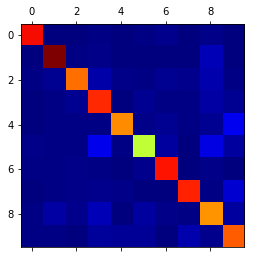

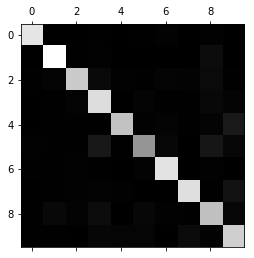

In [34]:
plt.matshow(conf_mat)
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

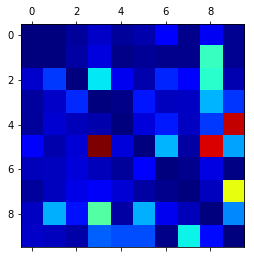

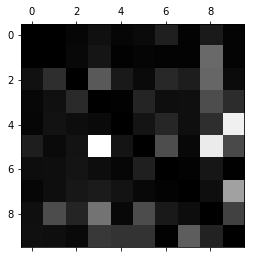

In [35]:
'''Rows represent actual classes, while columns represent predicted classes

Analysing the confusion matrix will give insight into how to improve your classifier.  
As you can see the actual 5 and predicted 8 has confusion. You could preprocess the images (openCV) or engineer
new features to help the classifier -- for example, writing an algorithm to count the number of closed loops
'''

row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat / row_sums

np.fill_diagonal(norm_conf_mat, 0)
plt.matshow(norm_conf_mat)
plt.matshow(norm_conf_mat, cmap=plt.cm.gray)
plt.show()

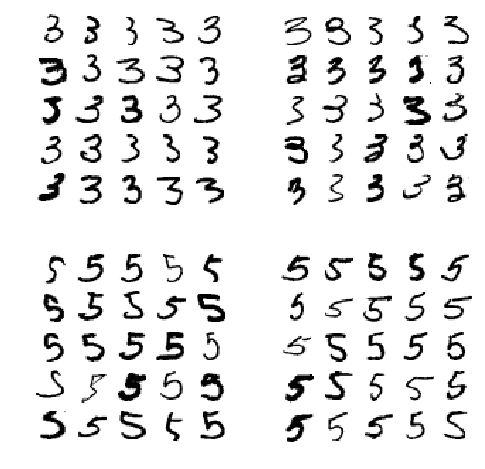

In [36]:
'''Analizing individual errors may be helpful as well, but more time consuming

Two subplot on the left were classified as 3s and the two on the right were classified as 5s'''

cl_a, cl_b, = 3, 5

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize= (8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

plt.show()

## Multilabel Classification

Sometimes you want multiple classifications on a single image/ object (i.e. face recognition in pictures)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
# print(y_multilabel)

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [59]:
i = 40000 #must be less than 70000 (size of dataset)

some_digit = X[i]
print('Actually as: ', int(y[i]))

print('Classified as large?:', knn_clf.predict([some_digit])[0][0], '\tOdd?:', knn_clf.predict([some_digit])[0][1])


Actually as:  6
Classified as large?: 0 	Odd?: 0


In [61]:
'''This assumes that all labels are equally important, which may not be the case.  If you have more examples of
one class, you may want to give more weight to the classifier's score.  One simple option is to weight the average
in the following code.'''
# These two lines of code take a while to run
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average='macro')

0.96819228316790684

# Multioutput Classification

A generalization of multilabel classification where each label can be multiclass (ie. you can have more than one classifcation)

To illustrate this, lets build a system that removes noise from an image. It will take as input a noisy digital image, representied as an array of pixel intensities, just like the MNIST dataset.  Notice that the classifier's output is multilabel (one label per pixel: 784 labels (28x28) per image) and each label can have multiple values (0 to 255)

Image of noisy dataset: 


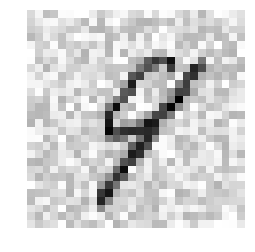

Image of clean dataset: 


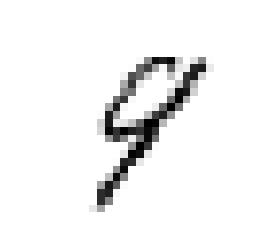

In [53]:


noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

knn_clf.fit(X_train_mod, y_train_mod)


Image of noisy dataset: 


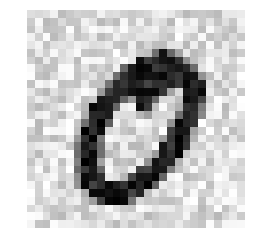

Image of clean dataset: 


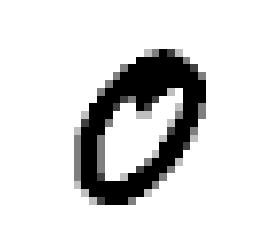

Cleaned digit


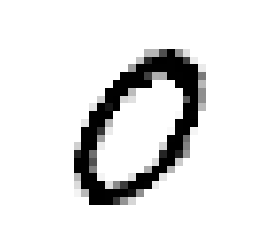

In [58]:
i = 950 #must be less than 10000 (size of dataset)

some_digit_noise = X_test_mod[i].reshape(28,28)
some_digit_cl = y_test_mod[i].reshape(28,28)
# some_digit_nosie_image = some_digit_noise.reshape(28,28)

print('Image of noisy dataset: ')
plt.imshow(some_digit_noise, cmap=matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

print('Image of clean dataset: ')
plt.imshow(some_digit_cl, cmap=matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

print('Cleaned digit from noisy dataset')
clean_digit = knn_clf.predict([X_test_mod[i]]).reshape(28,28)
plt.imshow(clean_digit, cmap=matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()